# Notebook

> ex.: Markdown
---

##Atalhos Úteis do Google Colab
### Navegação:

- ↑/↓: Mover entre células
- Ctrl + ↑/↓: Mover entre células em blocos
- Alt + ↑/↓: Mover entre células no modo de comando
- Ctrl + Enter: Executar célula
- Shift + Enter: Executar célula e criar nova célula abaixo
- Ctrl + M D: Excluir célula
- Ctrl + Z: Desfazer
- Ctrl + Y: Refazer

In [ ]:
# Código python
print("Olá")



Olá


# Outra

# Pandas

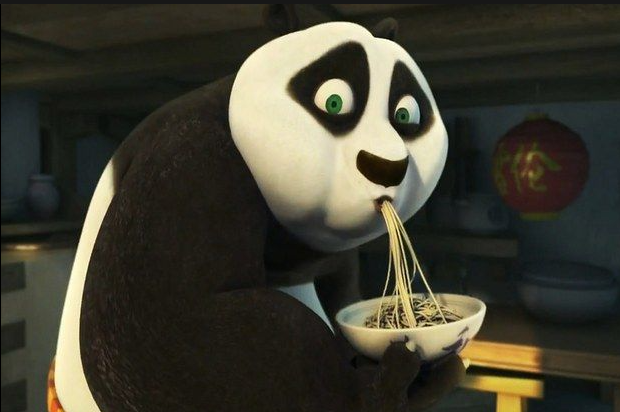

In [ ]:
import pandas as pd

# Criando um DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

df.head()

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
# Acessando a célula na linha 1, coluna 'A'
valor = df.loc[1, 'A']
print(valor)

2


In [ ]:
# Acessando a coluna 'B'
coluna_b = df['B']

print(coluna_b)

0    4
1    5
2    6
Name: B, dtype: int64


In [ ]:
sub_df = df.loc[[0, 1], ['A', 'B']]

print(sub_df)

   A  B
0  1  4
1  2  5


In [ ]:
# Selecionando linhas onde o valor na coluna 'A' é maior que 2
# índice booleano
df_filtro = df[df['A'] > 2]
print(df_filtro)

   A  B
2  3  6


In [ ]:
# Acessando a segunda coluna
segunda_coluna = df.iloc[:, 1]
print(segunda_coluna)

0    4
1    5
2    6
Name: B, dtype: int64


# BigQuery

> Fonte

## Configurações BigQuery

In [ ]:
from google.colab import auth     # Authenticator
from google.cloud import bigquery # API

In [ ]:
# Função de autenticação
auth.authenticate_user()

### Hierarquia Google Cloud

- **Projeto**
  - Possui várias configurações e recursos
  - Pode conter:
    - **Conjunto de dados**
      - Coleção organizada de informações
      - Composto por:
        - **Tabelas**
          - Armazenam dados de forma estruturada

In [ ]:
# Definição do projeto

PROJECT_ID = 'pratica-419501'
cliente = bigquery.Client(project=PROJECT_ID)

In [ ]:
# Definição do Conjunto de Dados

dataset = 'frota01'
dataset_ref = cliente.dataset(dataset)

In [ ]:
# Listar tabelas do Conjunto

tabelas_obj = (cliente.list_tables(dataset_ref)) # Objeto iterator

tabelas = [tabela.table_id for tabela in tabelas_obj]

print(tabelas)

['tb_Frota', 'tb_Municipio', 'tb_Registro_frota']


# Extração

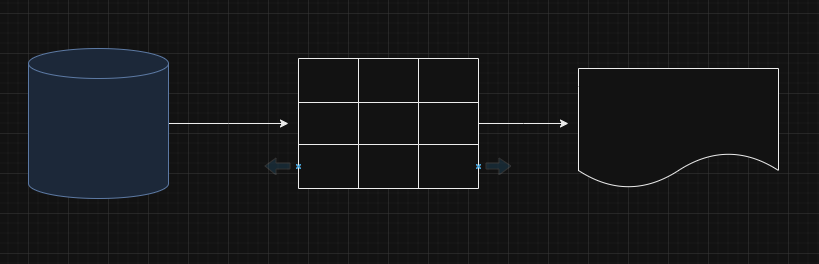

## História



> **Alice**, uma profissional do departamento de marketing de uma **rede de oficinas de veículos por assinatura**, está **planejando uma campanha** para o Nordeste, com foco em **Alagoas e Pernambuco**. Já Com diversas métricas em mãos, ela também pretende **extrair o máximo dos dados fornecidos pelo Ministério dos Transportes**, que **contêm informações cruciais sobre Estatísticas de Frota de Veículos**, para compreender o perfil dos clientes. No entanto, **os dados estão desorganizados.** Com a assistência de **Bob**, **especialista em dados**, ela busca consolidá-los em uma **única tabela** e torná-los **acessíveis para a equipe**, facilitando a análise da eficácia das estratégias de marketing.

In [ ]:
# Esquema do banco

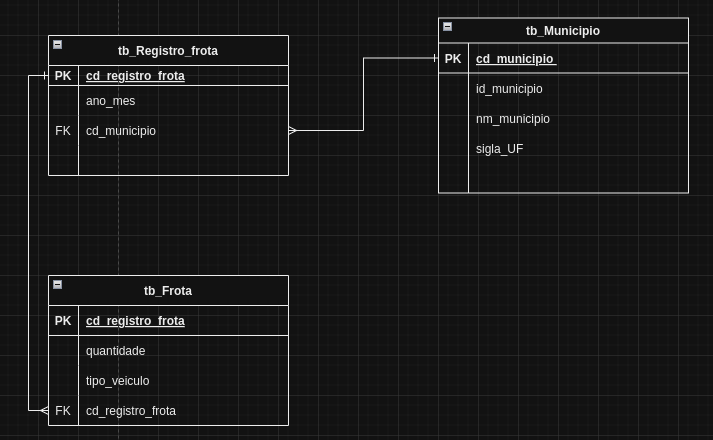

### Descrição



  

####Tabelas:

- **tb_Registro_frota** -> Armazena dados sobre o registro de frota por ano/mês
 - Atributos:
    - cd_registro_frota -> Chave primária (inteiro)
    - ano_mes -> Ano e mês do registro (string)
    - cd_municipio -> Chave estrangeira - município ao qual a frota pertence (inteiro)
- **tb_Municipio** -> Armazena dados sobre o Município
 - Atributos:
   - cd_municipio -> Chave primária (inteiro)
   - id_municipio -> Código IBGE do município (inteiro)
   - nm_municipio -> Nome do município (string)
   - sigla_uf -> Sigla UF (string)

- **tb_Frota** -> Armazena as características da frota registrada

  - Atributos:
    - quantidade -> Quantidade por unidade de cada tipo de veículo (inteiro)
    - tipo_veiculo -> Categoria da frota (string)
    - **cd_registro_frota** -> Chave estrangeira do registro (inteiro)

### Construção da Query

In [ ]:
query = '''
SELECT
  rf.cd_registro_frota,
  rf.ano_mes,
  m.id_municipio,
  m.nm_municipio,
  m.sigla_UF,
  f.tipo_veiculo,
  f.quantidade
FROM frota01.tb_Registro_frota AS rf
INNER JOIN frota01.tb_Municipio AS m
  ON rf.cd_municipio = m.cd_monicipio
INNER JOIN frota01.tb_Frota as f
  ON f.cd_registro_frota = rf.cd_registro_frota;
'''

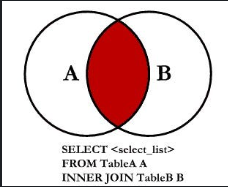

## Definições

In [ ]:
import logging
# Configure logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

In [ ]:
def extracao_sql(id_projeto: str, dataset: str, query: str):
  """
  Função para extrair dados do BigQuery usando uma consulta SQL.

  Argumentos:
    id_projeto: ID do projeto do Google Cloud.
    dataset: Nome do dataset no BigQuery.
    query: Consulta SQL a ser executada.

  Retorno:
    DataFrame.
  """

  try:
    # Cria um cliente do BigQuery
    cliente = bigquery.Client(id_projeto)

    # Obtém a referência do dataset
    dataset_ref = cliente.dataset(dataset)

    # Executa a consulta SQL
    job = cliente.query(query)

    # Obtém os resultados da consulta
    rows = job.result()

    # Converte os resultados para um DataFrame Pandas
    return rows.to_dataframe()

  except Exception as e:
        logging.error(f"ocorreu um erro durante a execução: {e}")
        raise e

In [ ]:
id_projeto = 'pratica-419501'
dataset = 'frota01'

# Extração db
df = extracao_sql(id_projeto, dataset, query)

# Carga com pd
df_frota = pd.DataFrame(df)

df_frota.head(10)

,cd_registro_frota,ano_mes,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,quantidade
0,19278,2020-1,2700102,Água Branca,AL,motoneta,138
1,19279,2020-1,2700102,Água Branca,AL,automovel,1049
2,19280,2020-1,2700102,Água Branca,AL,onibus,31
3,19281,2020-1,2700102,Água Branca,AL,motocicleta,2323
4,19282,2020-1,2700102,Água Branca,AL,caminhao,119
5,19283,2020-1,2700102,Água Branca,AL,reboque,24
6,19284,2020-1,2700102,Água Branca,AL,micro-onibus,92
7,19285,2020-1,2700102,Água Branca,AL,caminhonete,545
8,19286,2020-1,2700102,Água Branca,AL,camioneta,41
9,19287,2020-1,2700201,Anadia,AL,reboque,49


In [ ]:
df_frota.shape

(195144, 7)

## Validação

In [ ]:
linhas_inicio = df_frota.shape[0]
colunas_inicio = df_frota.shape[1]

In [ ]:
df_frota.shape

(195144, 7)

In [ ]:
def validacao_estrutura(df, linhas_drop = 0, colunas_drop = 0, linhas_origem=linhas_inicio, colunas_origem=colunas_inicio):

  assert (df.shape[0] + linhas_drop) == linhas_origem, f"A quantidade de linhas no DataFrame ({df.shape[0] + linhas_drop}) não corresponde ao número esperado ({linhas_origem})"
  assert (df.shape[1] + colunas_drop) == colunas_origem, f"A quantidade de colunas no DataFrame ({df.shape[1] + colunas_drop}) não corresponde ao número esperado ({colunas_origem})"

  #Dispara um erro de AssertionError caso o teste retorne False.

In [ ]:
# Formato
validacao_estrutura(df_frota)

# Transformação

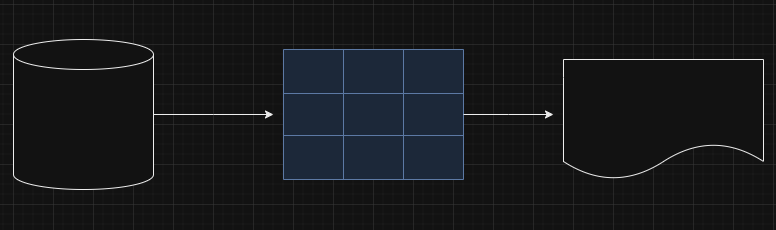

### Exploração

In [ ]:
# Amostra Aleatória
df_frota.sample(10)

,cd_registro_frota,ano_mes,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,quantidade
188385,186503,2023-11,2613800,None,PE,quadriciclo,0
150849,42864,2023-9,2703205,Igreja Nova,AL,automovel,1240
128270,108735,2023-5,2602308,Bonito,PE,caminhao,409
109072,9398,2023-2,2708105,Santana do Mundaú,AL,automovel,600
92716,51125,2022-7,2704401,Major Isidoro,AL,motocicleta,2057
9434,145118,2020-2,2605004,Cupira,PE,semi-reboque,26
187099,182652,2023-11,2608404,Jurema,PE,caminhonete,248
170043,49958,2022-10,2703106,Igaci,AL,micro-onibus,120
116862,112076,2023-3,2605707,Floresta,PE,chassi plataforma,0
70512,166034,2022-3,2605301,Exu,PE,trator rodas,0


### Renomeando colunas



In [ ]:
# dt = data
# cd = código
# qt = quantidade

df_frota.rename(columns={'ano_mes': 'dt_registro'}, inplace=True)
df_frota.rename(columns={'quantidade': 'qt_veiculo'}, inplace=True)

In [ ]:
# últimas linhas
df_frota.tail()

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
195139,18859,2023-12,2703908,Jundiá,AL,caminhao trator,1
195140,134818,2023-12,2607802,Itaquitinga,PE,motocicleta,1628
195141,134818,2023-12,2607802,Itaquitinga,PE,motocicleta,1628
195142,134818,2023-12,2607802,Itaquitinga,PE,motocicleta,1628
195143,134818,2023-12,2607802,Itaquitinga,PE,motocicleta,1628


### Conversão de Tipos de Dados

In [ ]:
## Verifiação de tipos

df_frota.dtypes

cd_registro_frota     Int64
dt_registro          object
id_municipio          Int64
nm_municipio         object
sigla_UF             object
tipo_veiculo         object
qt_veiculo            Int64
dtype: object

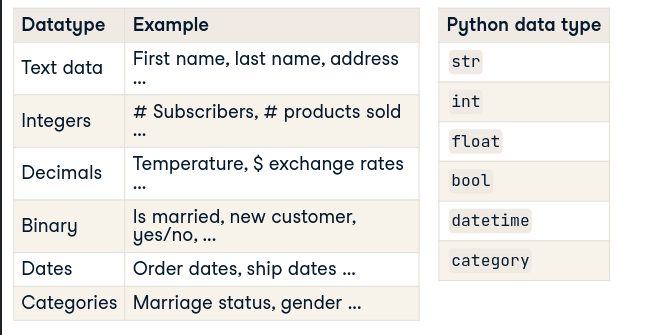#

In [ ]:
# Chave: nome da coluna | valor: tipo
dict_tipos_esperados = dict(df_frota.dtypes)
dict_tipos_esperados

{'cd_registro_frota': Int64Dtype(),
 'dt_registro': dtype('O'),
 'id_municipio': Int64Dtype(),
 'nm_municipio': dtype('O'),
 'sigla_UF': dtype('O'),
 'tipo_veiculo': dtype('O'),
 'qt_veiculo': Int64Dtype()}

In [ ]:
# Objetivo
dict_tipos_esperados['dt_registro'] = 'datetime64[ns]'
dict_tipos_esperados['tipo_veiculo'] = 'category'

In [ ]:
def validacao_tipos(df, dict_tipos_esperados):
    tipos_do_df = df.dtypes
    for coluna, tipo_esperado in dict_tipos_esperados.items():
        tipo_no_df = tipos_do_df[coluna]
        assert tipo_esperado == tipo_no_df, f"O tipo '{tipo_no_df}' não é o esperado: '{tipo_esperado}' para a coluna '{coluna}'"

In [ ]:
validacao_tipos(df_frota, dict_tipos_esperados)

AssertionError: O tipo 'object' não é o esperado: 'datetime64[ns]' para a coluna 'dt_registro'

#### Conversão da coluna 'dt_registro'

In [ ]:
df_frota['dt_registro']

0          2020-1
1          2020-1
2          2020-1
3          2020-1
4          2020-1
           ...   
195139    2023-12
195140    2023-12
195141    2023-12
195142    2023-12
195143    2023-12
Name: dt_registro, Length: 195144, dtype: object

In [ ]:
df_frota['dt_registro'] = pd.to_datetime(df_frota['dt_registro'], format='%Y-%m')

In [ ]:
df_frota['dt_registro'].describe() # obs.: Cobertura temporal

count                           195144
mean     2022-03-20 14:25:48.296642560
min                2020-01-01 00:00:00
25%                2021-04-01 00:00:00
50%                2022-05-01 00:00:00
75%                2023-05-01 00:00:00
max                2023-12-01 00:00:00
Name: dt_registro, dtype: object

In [ ]:
validacao_tipos(df_frota, dict_tipos_esperados)

AssertionError: O tipo 'object' não é o esperado: 'category' para a coluna 'tipo_veiculo'

#### Conversão da coluna 'tipo_veiculo'

In [ ]:
df_frota['tipo_veiculo'].describe()

count        195144
unique           87
top       automovel
freq           9347
Name: tipo_veiculo, dtype: object

In [ ]:
df_frota['tipo_veiculo'].unique()

array(['motoneta', 'automovel', 'onibus', 'motocicleta', 'caminhao',
       'reboque', 'micro-onibus', 'caminhonete', 'camioneta',
       'ciclomotor', 'caminhao trator', 'utilitario', 'semi-reboque',
       'triciclo', 'outros', 'motocicleta ', 'REBOQUE', 'quadriciclo',
       'chassi plataforma', 'side-car', 'bonde', 'trator rodas',
       'trator esteira', 'UTILITARIO', 'Semi-Reboque', 'SEMI-REBOQUE',
       'CAMIONETA', 'Motocicleta', 'MOTONETA', 'Reboque', 'Trator Rodas',
       'quadriciclo ', 'trator esteira ', 'Caminhao Trator',
       'Quadriciclo', 'Onibus', 'caminhonete ', 'OUTROS', 'AUTOMOVEL',
       'ONIBUS', 'motoneta ', 'onibus ', 'Triciclo', 'TRATOR RODAS',
       'Utilitario', 'utilitario ', 'Trator Esteira', 'MICRO-ONIBUS',
       'CAMINHAO TRATOR', 'Automovel', 'Chassi Plataforma',
       'Micro-Onibus', 'MOTOCICLETA', 'CAMINHONETE', 'caminhao trator ',
       'chassi plataforma ', 'CAMINHAO', 'ciclomotor ', 'Caminhonete',
       'Camioneta', 'Bonde', 'Outros', 'SID

In [ ]:
# Padronização tipo_veiculo #
  # case: minúsculas
  # Não devem conter espaços no início, no fim ou no meio.

# Função lower

df_frota['tipo_veiculo'] = df_frota['tipo_veiculo'].str.lower()
df_frota['tipo_veiculo'].unique()

array(['motoneta', 'automovel', 'onibus', 'motocicleta', 'caminhao',
       'reboque', 'micro-onibus', 'caminhonete', 'camioneta',
       'ciclomotor', 'caminhao trator', 'utilitario', 'semi-reboque',
       'triciclo', 'outros', 'motocicleta ', 'quadriciclo',
       'chassi plataforma', 'side-car', 'bonde', 'trator rodas',
       'trator esteira', 'quadriciclo ', 'trator esteira ',
       'caminhonete ', 'motoneta ', 'onibus ', 'utilitario ',
       'caminhao trator ', 'chassi plataforma ', 'ciclomotor ',
       'camioneta ', 'outros ', 'semi-reboque ', 'triciclo ', 'bonde ',
       'reboque ', 'micro-onibus ', 'caminhao ', 'automovel ',
       'trator rodas ', 'side-car '], dtype=object)

[Regex](https://regexr.com/)

In [ ]:
# Remove os espaços contidos no meio da string
df_frota['tipo_veiculo'] = df_frota['tipo_veiculo'].str.replace(r"\s+", "", n=-1, regex=True)
df_frota['tipo_veiculo'].unique()

array(['motoneta', 'automovel', 'onibus', 'motocicleta', 'caminhao',
       'reboque', 'micro-onibus', 'caminhonete', 'camioneta',
       'ciclomotor', 'caminhaotrator', 'utilitario', 'semi-reboque',
       'triciclo', 'outros', 'quadriciclo', 'chassiplataforma',
       'side-car', 'bonde', 'tratorrodas', 'tratoresteira'], dtype=object)

In [ ]:
# Função nativa strip
df_frota['tipo_veiculo'] = df_frota['tipo_veiculo'].str.strip()
df_frota['tipo_veiculo'].unique()

array(['motoneta', 'automovel', 'onibus', 'motocicleta', 'caminhao',
       'reboque', 'micro-onibus', 'caminhonete', 'camioneta',
       'ciclomotor', 'caminhaotrator', 'utilitario', 'semi-reboque',
       'triciclo', 'outros', 'quadriciclo', 'chassiplataforma',
       'side-car', 'bonde', 'tratorrodas', 'tratoresteira'], dtype=object)

In [ ]:
df_frota['tipo_veiculo'].describe()

count        195144
unique           21
top       automovel
freq           9374
Name: tipo_veiculo, dtype: object

In [ ]:
df_frota['tipo_veiculo'] = df_frota['tipo_veiculo'].astype('category')
df_frota['tipo_veiculo'].describe()

count        195144
unique           21
top       automovel
freq           9374
Name: tipo_veiculo, dtype: object

In [ ]:
df_frota.dtypes

cd_registro_frota             Int64
dt_registro          datetime64[ns]
id_municipio                  Int64
nm_municipio                 object
sigla_UF                     object
tipo_veiculo               category
qt_veiculo                    Int64
dtype: object

In [ ]:
validacao_tipos(df_frota, dict_tipos_esperados)

### Duplicados

In [ ]:
# Obtendo linhas duplicadas todos os atributos

duplicadas = df_frota.duplicated()

duplicadas # index boleanos

0         False
1         False
2         False
3         False
4         False
          ...  
195139     True
195140     True
195141     True
195142     True
195143     True
Length: 195144, dtype: bool

192120

192552

In [ ]:
df_frota[duplicadas]

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
198,19475,2020-01-01,2702355,Craíbas,AL,automovel,1689
199,19475,2020-01-01,2702355,Craíbas,AL,automovel,1689
200,19475,2020-01-01,2702355,Craíbas,AL,automovel,1689
628,19902,2020-01-01,2707008,Pindoba,AL,caminhonete,33
629,19902,2020-01-01,2707008,Pindoba,AL,caminhonete,33
...,...,...,...,...,...,...,...
195139,18859,2023-12-01,2703908,Jundiá,AL,caminhaotrator,1
195140,134818,2023-12-01,2607802,Itaquitinga,PE,motocicleta,1628
195141,134818,2023-12-01,2607802,Itaquitinga,PE,motocicleta,1628
195142,134818,2023-12-01,2607802,Itaquitinga,PE,motocicleta,1628


In [ ]:
# Função de validação
def validacao_linha_unica(df, colunas = []):
    if colunas:
        assert df.duplicated(subset=colunas).sum() == 0, "Existe linha(s) parcialmente(s) duplicadas"
    else:
        assert df.duplicated().sum() == 0, "Existe linha(s) duplicadas"

In [ ]:
#validacao_linha_unica(df_frota)

In [ ]:
# Manter o primeiro
duplicado_subset = df_frota.duplicated(keep = 'first')
df_duplicados_total = df_frota[duplicado_subset].sort_values(by='cd_registro_frota')

In [ ]:
# Remove e armazena qt de linhas removidas
rm01_l = df_duplicados_total.shape[0]
df_frota = df_frota.drop(df_duplicados_total.index, axis=0) # axis=0 linhas axis=1 coluna

In [ ]:
# Validação
validacao_estrutura(df_frota, rm01_l)
validacao_linha_unica(df_frota)

#### Duplicados Parciais: Identificação e Tratamento
 - Diferenças em certos atributos

 - Identificar
    - **Atributo ou conjunto de atributos que não podem se repetir**

In [ ]:
# [cd_registro_frota] Não pode ter repetição

coluna = ['cd_registro_frota']
duplicados_parc = df_frota.duplicated(subset=coluna, keep='first') # | last | first | False

df_duplicados_parc = df_frota[duplicados_parc]

df_duplicados_parc

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
24584,94611,2020-05-01,2700508,Barra de Santo Antônio,AL,side-car,900000
98533,49312,2022-09-01,2702504,Dois Riachos,AL,onibus,1000000


In [ ]:
# Remove e armazena qt de linhas removidas
rm02_l = df_duplicados_parc.shape[0]
df_frota = df_frota.drop(df_duplicados_parc.index, axis=0)

In [ ]:
# Validação

validacao_estrutura(df_frota, rm02_l+rm01_l)
validacao_linha_unica(df_frota, coluna)

### Valores Faltantes

> Formas:
  ``NA``, ``nan``, ``0``,``None``....

In [ ]:
# função de validação

def validacao_nao_na(df):
  # .isna retorna os valores faltantes por coluna
  dic_na = df_frota.isna().sum()
  for coluna, qt_na in dic_na.items():
    assert qt_na == 0, f"Existe {qt_na} valores faltantes na coluna {coluna}"

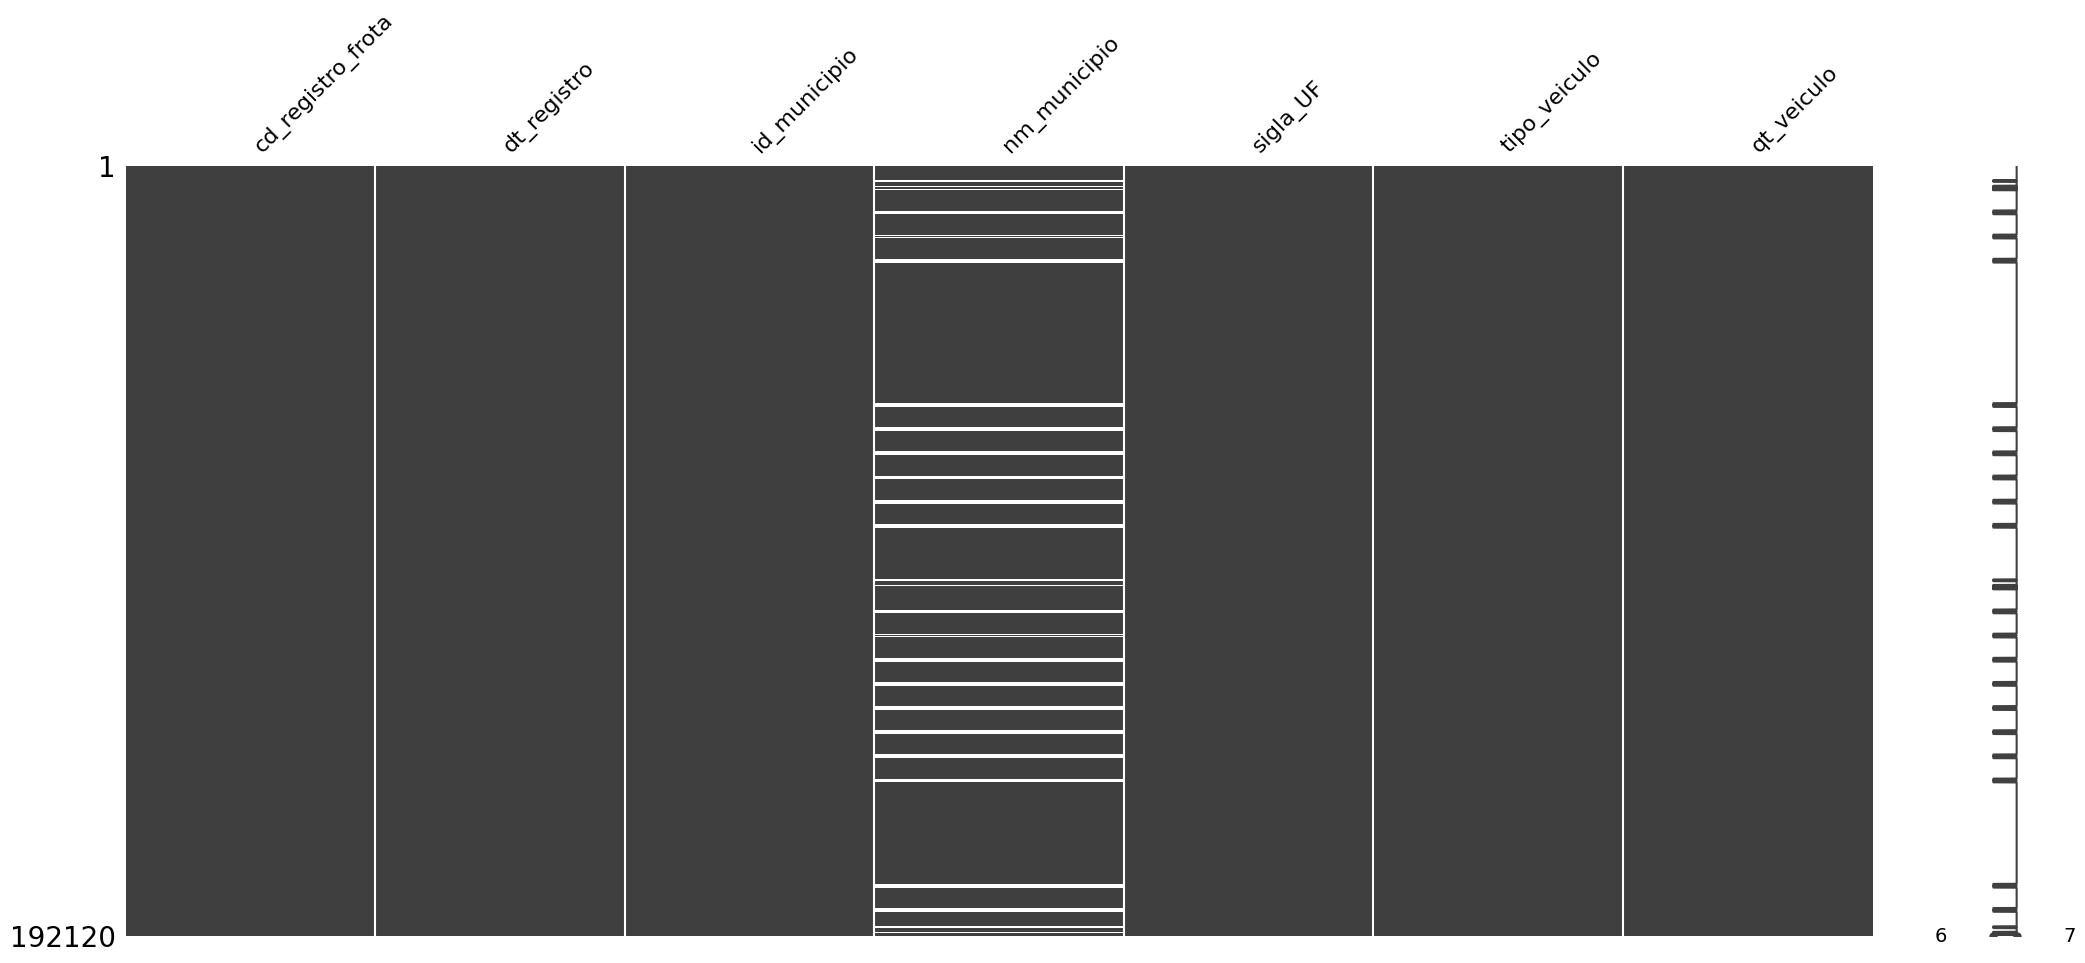

In [ ]:
# Plot Nans
import missingno as msno
import matplotlib.pyplot as plt

# visualização
msno.matrix(df_frota)
plt.show()

In [ ]:
# Entendendo valores NaNs da coluna 'nm_municipio'

valor_na_munic = df_frota['nm_municipio'].isna()

df_valor_na_munic = df_frota.loc[valor_na_munic,['id_municipio']]

df_valor_na_munic

,id_municipio
3560,2612455
3561,2612455
3562,2612455
3563,2612455
3564,2612455
...,...
195095,2615607
195096,2616001
195097,2616100
195098,2616183


In [ ]:
df_valor_na_munic['id_municipio'].unique()

<IntegerArray>
[2612455, 2612471, 2612505, 2612554, 2612604, 2612703, 2612802, 2612901,
 2613008, 2613107, 2613206, 2613305, 2613404, 2613503, 2613602, 2613701,
 2613800, 2613909, 2614006, 2614105, 2614204, 2614402, 2614501, 2614600,
 2614709, 2614808, 2614857, 2615003, 2615102, 2615201, 2615300, 2615409,
 2615508, 2615607, 2615706, 2615805, 2615904, 2616001, 2616100, 2616183,
 2616209, 2616308, 2616407, 2616506]
Length: 44, dtype: Int64

In [ ]:
# Buscar valores para esses código IBGE

# Via API IBGE
import json
import requests

def buscar_cd_munic(cd_municipio):
    endpoint = f'https://servicodados.ibge.gov.br/api/v1/localidades/municipios/{cd_municipio}'
    response = requests.get(endpoint)

    if response.status_code == 200:
        js_dic = json.loads(response.text)
        return js_dic
    else:
        return None

In [ ]:
lista_code_buscar = df_valor_na_munic['id_municipio'].unique()
dic_code_nm_munic = dict()

for code in lista_code_buscar:
  nm_municipio = buscar_cd_munic(code)
  dic_code_nm_munic[code] = nm_municipio['nome']

dic_code_nm_munic

{2612455: 'Santa Cruz',
 2612471: 'Santa Cruz da Baixa Verde',
 2612505: 'Santa Cruz do Capibaribe',
 2612554: 'Santa Filomena',
 2612604: 'Santa Maria da Boa Vista',
 2612703: 'Santa Maria do Cambucá',
 2612802: 'Santa Terezinha',
 2612901: 'São Benedito do Sul',
 2613008: 'São Bento do Una',
 2613107: 'São Caitano',
 2613206: 'São João',
 2613305: 'São Joaquim do Monte',
 2613404: 'São José da Coroa Grande',
 2613503: 'São José do Belmonte',
 2613602: 'São José do Egito',
 2613701: 'São Lourenço da Mata',
 2613800: 'São Vicente Férrer',
 2613909: 'Serra Talhada',
 2614006: 'Serrita',
 2614105: 'Sertânia',
 2614204: 'Sirinhaém',
 2614402: 'Solidão',
 2614501: 'Surubim',
 2614600: 'Tabira',
 2614709: 'Tacaimbó',
 2614808: 'Tacaratu',
 2614857: 'Tamandaré',
 2615003: 'Taquaritinga do Norte',
 2615102: 'Terezinha',
 2615201: 'Terra Nova',
 2615300: 'Timbaúba',
 2615409: 'Toritama',
 2615508: 'Tracunhaém',
 2615607: 'Trindade',
 2615706: 'Triunfo',
 2615805: 'Tupanatinga',
 2615904: 'Tupa

In [ ]:
# Preenche os nomes dos municípios faltantes na coluna `nm_municipio` utilizando a função `map`.
#
# A função `map` aplica a função lambda `lambda x: dic_code_nm_munic[x]` a cada código de município na série `df_frota['id_municipio']`. Essa função lambda retorna o nome do município associado ao código, de acordo com o dicionário `dic_code_nm_munic`.

df_frota.loc[df_frota['id_municipio'].isin(lista_code_buscar), 'nm_municipio'] = df_frota['id_municipio'].map(dic_code_nm_munic)

In [ ]:
df_frota.loc[df_frota['id_municipio'].isin(lista_code_buscar)]

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
3560,139169,2020-01-01,2612455,Santa Cruz,PE,caminhao,185
3561,139170,2020-01-01,2612455,Santa Cruz,PE,caminhonete,202
3562,139171,2020-01-01,2612455,Santa Cruz,PE,motoneta,63
3563,139172,2020-01-01,2612455,Santa Cruz,PE,automovel,591
3564,139173,2020-01-01,2612455,Santa Cruz,PE,onibus,30
...,...,...,...,...,...,...,...
195095,137776,2023-12-01,2615607,Trindade,PE,onibus,20
195096,137777,2023-12-01,2616001,Venturosa,PE,semi-reboque,20
195097,137778,2023-12-01,2616100,Verdejante,PE,onibus,20
195098,137779,2023-12-01,2616183,Vertente do Lério,PE,onibus,20


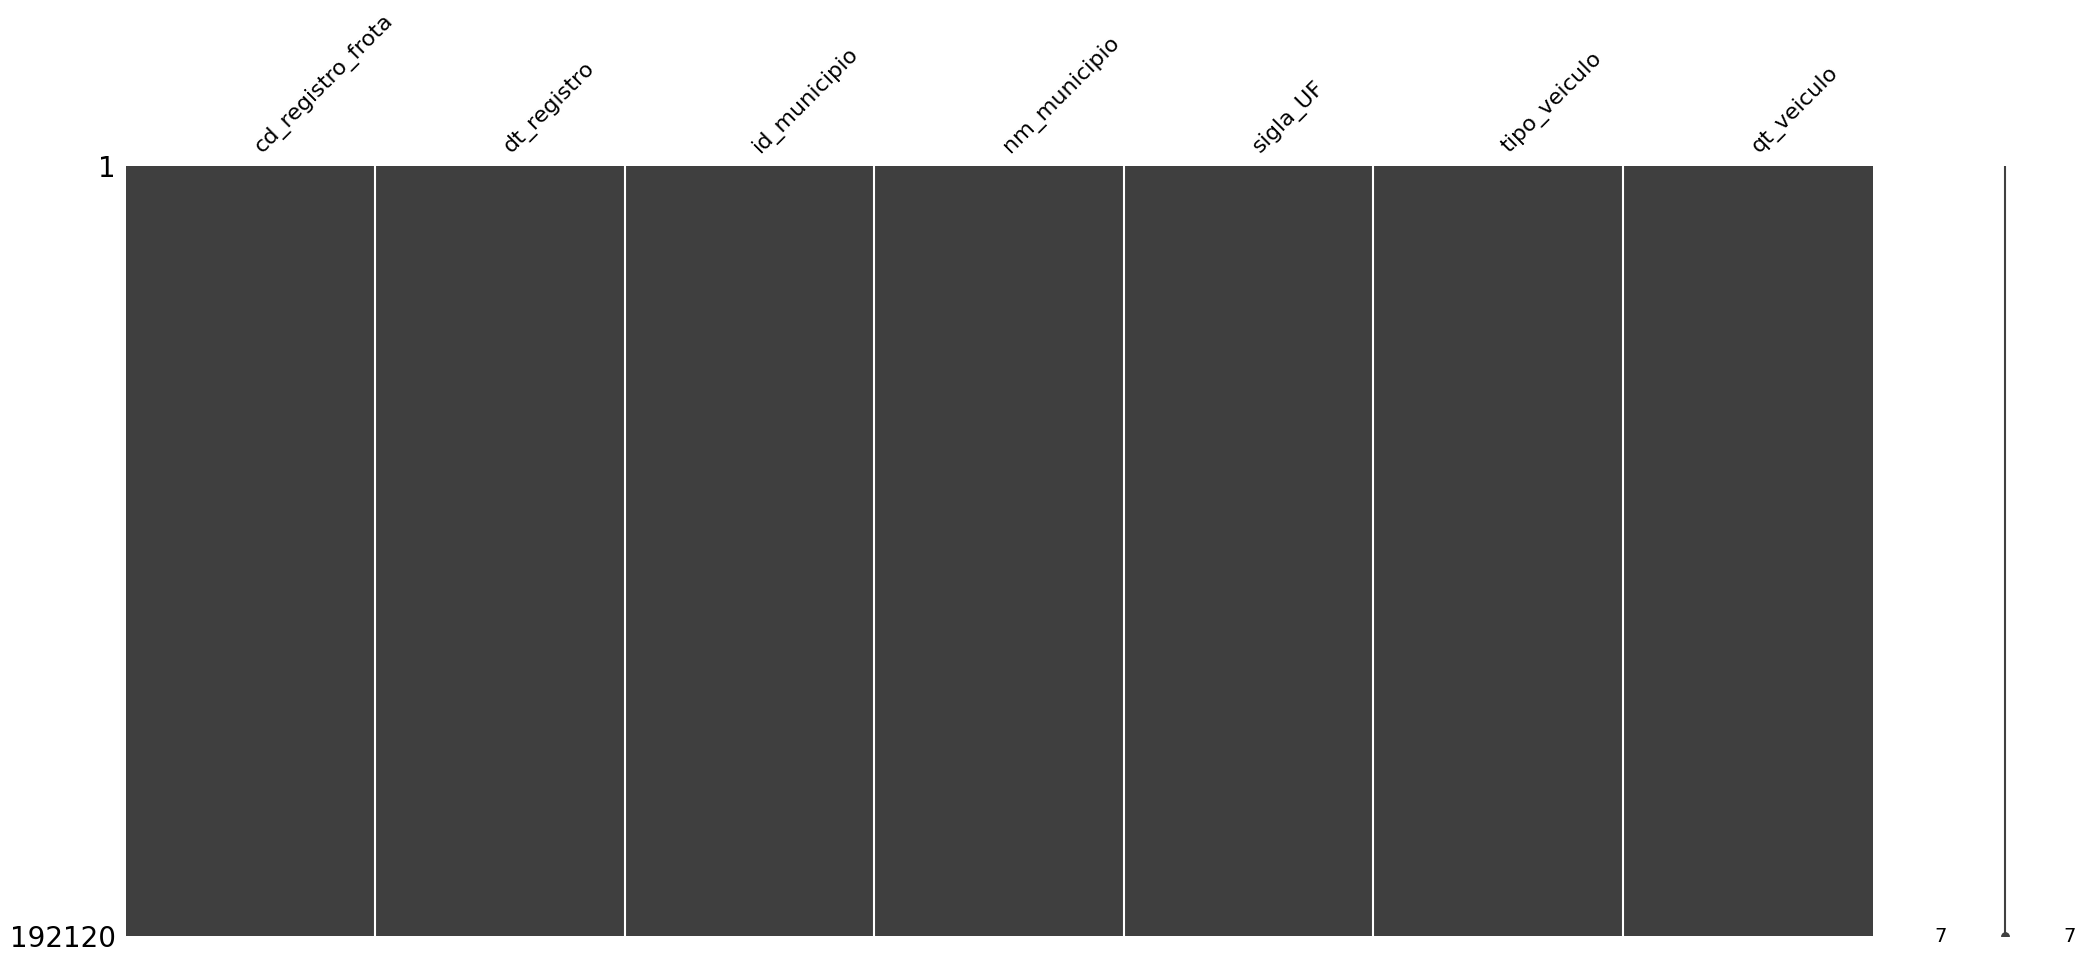

In [ ]:
msno.matrix(df_frota)
plt.show()

In [ ]:
# Validações
validacao_nao_na(df_frota)

### Identificar e analisar valores discrepantes 'qt_veiculos'

In [ ]:
df_frota['qt_veiculo'].describe()

count       192120.0
mean      655.969405
std      6866.982872
min              0.0
25%              0.0
50%             13.0
75%            123.0
max         900000.0
Name: qt_veiculo, dtype: Float64

<Axes: ylabel='qt_veiculo'>

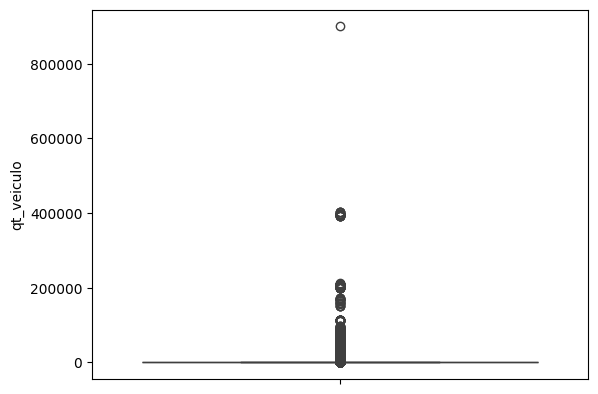

In [ ]:
import seaborn as sns
# Visualizar a distribuição dos dados
sns.boxplot(data=df_frota['qt_veiculo'])

In [ ]:
## outliers

outliers = df_frota.loc[df_frota['qt_veiculo'] > 600000]
outliers

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
101149,7,2023-01-01,2700102,Água Branca,AL,micro-onibus,900000


In [ ]:
df_frota_al_23 = df_frota.loc[(df_frota['dt_registro'].dt.year == 2023) & (df_frota['id_municipio'] == 2700102)]
df_frota_al_23

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
101142,0,2023-01-01,2700102,Água Branca,AL,caminhonete,590
101143,1,2023-01-01,2700102,Água Branca,AL,reboque,33
101144,2,2023-01-01,2700102,Água Branca,AL,automovel,1252
101145,3,2023-01-01,2700102,Água Branca,AL,caminhao,160
101146,4,2023-01-01,2700102,Água Branca,AL,onibus,31
...,...,...,...,...,...,...,...
190982,19072,2023-12-01,2700102,Água Branca,AL,outros,8
190983,19073,2023-12-01,2700102,Água Branca,AL,utilitario,8
191021,19111,2023-12-01,2700102,Água Branca,AL,caminhaotrator,10
191136,19226,2023-12-01,2700102,Água Branca,AL,ciclomotor,17


In [ ]:
df_micro_onib = df_frota_al_23.loc[df_frota_al_23['tipo_veiculo'] == 'micro-onibus']
df_micro_onib

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
101149,7,2023-01-01,2700102,Água Branca,AL,micro-onibus,900000
107261,2204,2023-02-01,2700102,Água Branca,AL,micro-onibus,100
113365,2205,2023-03-01,2700102,Água Branca,AL,micro-onibus,103
119504,2203,2023-04-01,2700102,Água Branca,AL,micro-onibus,103
125629,2202,2023-05-01,2700102,Água Branca,AL,micro-onibus,105
131691,10755,2023-06-01,2700102,Água Branca,AL,micro-onibus,107
137837,10756,2023-07-01,2700102,Água Branca,AL,micro-onibus,107
144018,10757,2023-08-01,2700102,Água Branca,AL,micro-onibus,106
150136,40744,2023-09-01,2700102,Água Branca,AL,micro-onibus,104
176833,40743,2023-10-01,2700102,Água Branca,AL,micro-onibus,104


In [ ]:
df_micro_onib = df_micro_onib.loc[df_micro_onib['qt_veiculo'] < 900000] # Remove o outliers para calcular a média
media_micro_23 = df_micro_onib['qt_veiculo'].mean().astype(int)
media_micro_23

104

In [ ]:
# Preenche qt_veiculo com a média do ano de 2023
df_frota.loc[outliers.index, 'qt_veiculo'] = media_micro_23
df_frota.loc[outliers.index, 'qt_veiculo']

101149    104
Name: qt_veiculo, dtype: Int64

### Validação da fase de Transformação

In [ ]:
# Validações
validacao_estrutura(df_frota, rm01_l+rm02_l)
validacao_tipos(df_frota, dict_tipos_esperados)
validacao_linha_unica(df_frota)
validacao_nao_na(df_frota)

# Carregamento

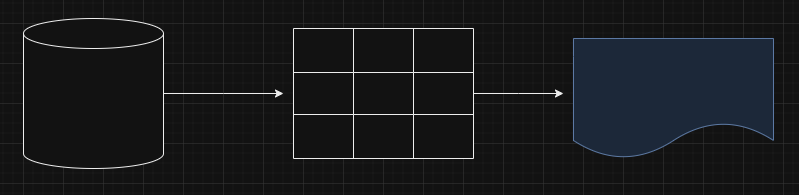

In [ ]:
#pip install --upgrade pandas-gbq

In [ ]:
from google.cloud import bigquery

# Definição do esquema
schema = [
    {'name': 'dt_registro', 'type': 'DATE'},
    {'name': 'tipo_veiculo', 'type': 'STRING'}
]


In [ ]:
from google.oauth2 import service_account
import pandas_gbq

key_path = '/content/drive/MyDrive/Aula /key.json'
credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=['https://www.googleapis.com/auth/bigquery']
)

df_frota.to_gbq(credentials=credentials, destination_table='frotaPE_AL.tb_frota', if_exists='replace', table_schema=schema)

100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


## Validating data

In [ ]:
query = "SELECT * FROM frotaPE_AL.tb_frota;"

In [ ]:
dataset = 'frotaPE_AL'

# Extração db
df = extracao_sql(id_projeto, dataset, query)

# Carga com pd
df_frota_tratado = pd.DataFrame(df)

df_frota_tratado.head()

,cd_registro_frota,dt_registro,id_municipio,nm_municipio,sigla_UF,tipo_veiculo,qt_veiculo
0,140013,2020-01-01,2605301,Exu,PE,bonde,0
1,145320,2020-02-01,2605301,Exu,PE,bonde,0
2,145322,2020-03-01,2605301,Exu,PE,bonde,0
3,145321,2020-04-01,2605301,Exu,PE,bonde,0
4,155757,2022-01-01,2605301,Exu,PE,bonde,0


In [ ]:
validacao_estrutura(df_frota_tratado, rm01_l+rm02_l)
validacao_tipos(df_frota_tratado, dict_tipos_esperados)

AssertionError: O tipo 'dbdate' não é o esperado: 'datetime64[ns]' para a coluna 'dt_registro'

In [ ]:
df_frota_tratado['dt_registro'] = pd.to_datetime(df_frota_tratado['dt_registro'])
df_frota_tratado['tipo_veiculo'] = df_frota_tratado['tipo_veiculo'].astype('category')

validacao_tipos(df_frota_tratado, dict_tipos_esperados)

In [ ]:
validacao_linha_unica(df_frota_tratado)
colunas = ['cd_registro_frota']
validacao_linha_unica(df_frota_tratado, colunas)

In [ ]:
validacao_nao_na(df_frota_tratado)

In [ ]:
df_frota_tratado.sample(20)